In [1]:
from datamarket import *

In [56]:
df = pd.DataFrame({'A': range(1, 5), 'B': range(11, 15)})

In [69]:
name = "bad"
df = df.assign(c =df['A'])
df = df.assign(name=df['B'] / df['A'] )
df

,A,B,c,name
0,1,11,1,11.000000
1,2,12,2,6.000000
2,3,13,3,4.333333
3,4,14,4,3.500000


In [128]:
# read seller dataset and split into train/test
gender = pd.read_csv("gender.csv")
gender_train = agg_dataset()
gender_train.load_buyer(gender, ["Number Tested"], "Mean Scale Score", ["DBN", ["DBN","Grade"], "School Name", "Year", "Category"], "gender")
gender_train.compute_agg()

In [3]:
# if want transform, need to standardize the transformed

crime = pd.read_csv("crime.csv")
crimedata = agg_dataset()
crimedata.load_seller(crime, ["DBN"], "crime", feature_transform = False, standardize = True)
crimedata.compute_agg(True)

ap = pd.read_csv("ap.csv")
apdata = agg_dataset()
apdata.load_seller(ap, ["DBN"], "ap", feature_transform = False, standardize = True)
apdata.compute_agg(True)

survey = pd.read_csv("2013_NYC_School_Survey.csv")
surveydata = agg_dataset()
surveydata.load_seller(survey, ["DBN"], "survey", feature_transform = False, standardize = True)
surveydata.compute_agg(True)

base = pd.read_csv("base.csv")
basedata = agg_dataset()
basedata.load_seller(base, ["DBN"], "base", feature_transform = False, standardize = True)
basedata.compute_agg(True)

disc = pd.read_csv("disc.csv")
discdata = agg_dataset()
discdata.load_seller(disc, ["DBN"], "disc", feature_transform = False, standardize = True)
discdata.compute_agg(True)

oss = pd.read_csv("oss.csv")
ossdata = agg_dataset()
ossdata.load_seller(oss, ["DBN"], "oss", feature_transform = False, standardize = True)
ossdata.compute_agg(True)

pe = pd.read_csv("pe.csv")
pedata = agg_dataset()
pedata.load_seller(pe, ["DBN"], "pe", feature_transform = False, standardize = True)
pedata.compute_agg(True)

s2tr = pd.read_csv("s2tr.csv")
s2trdata = agg_dataset()
s2trdata.load_seller(s2tr, ["DBN"], "s2tr", feature_transform = False, standardize = True)
s2trdata.compute_agg(True)

sat = pd.read_csv("sat.csv")
satdata = agg_dataset()
satdata.load_seller(sat, ["DBN"], "sat", feature_transform = False, standardize = True)
satdata.compute_agg(True)

pro = pd.read_csv("Schools_Progress_Report_2012-2013.csv")
prodata = agg_dataset()
prodata.load_seller(pro, ["DBN"], "pro", feature_transform = False, standardize = True)
prodata.compute_agg(True)

transfer = pd.read_csv("transfer.csv")
transferdata = agg_dataset()
transferdata.load_seller(transfer, ["DBN"], "transfer", feature_transform = False, standardize = True)
transferdata.compute_agg(True)

yabc = pd.read_csv("yabc.csv")
yabcdata = agg_dataset()
yabcdata.load_seller(yabc, ["DBN"], "yabc", feature_transform = False, standardize = True)
yabcdata.compute_agg(True)

dm1 = pd.read_csv("other/datamart.socrata.data-cityofnewyork-us.22rr-ujq3")
dm1data = agg_dataset()
dm1data.load_seller(dm1, ["DBN"], "dm1", feature_transform = False, standardize = True)
dm1data.compute_agg(True)

dm2 = pd.read_csv("other/datamart.socrata.data-cityofnewyork-us.25aa-q86c")
dm2data = agg_dataset()
dm2data.load_seller(dm2, ["DBN"], "dm2", feature_transform = False, standardize = True)
dm2data.compute_agg(True)

dm3 = pd.read_csv("other/datamart.socrata.data-cityofnewyork-us.29bv-qqsy")
dm3data = agg_dataset()
dm3data.load_seller(dm3, ["DBN"], "dm3", feature_transform = False, standardize = True)
dm3data.compute_agg(True)

dm4 = pd.read_csv("other/datamart.socrata.data-cityofnewyork-us.29ry-u5bf")
dm4data = agg_dataset()
dm4data.load_seller(dm4, ["DBN"], "dm4", feature_transform = False, standardize = True)
dm4data.compute_agg(True)


/home/jupyter/arda/arda-datasets/school/datamarket.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['cov:c'] = 1
/home/jupyter/arda/arda-datasets/school/datamarket.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['cov:Q:' + tablename + ":" + attributes[i] + ","+ tablename + ":" + attributes[j]] = self.data[attributes[i]] * self.data[attributes[j]]
/home/jupyter/arda/arda-datasets/school/datamarket.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [4]:
sellers = [(crimedata, "DBN"), (apdata, "DBN"), (surveydata, "DBN"), 
           (basedata, "DBN"), (discdata, "DBN"), 
           (ossdata, "DBN"), (pedata, "DBN"), (s2trdata, "DBN"), 
           (satdata, "DBN"), (prodata, "DBN"),
           (transferdata, "DBN"), (yabcdata, "DBN"), (dm1data, "DBN"),
           (dm2data, "DBN"), (dm3data, "DBN"), (dm4data, "DBN")]

sellersdict = dict()

for sellerdata, dimension in sellers:
    sellersdict[sellerdata.name] = sellerdata

In [82]:
def connect_outer(aggdata1, aggdata2, dimension, left_inp = False, right_attrs = []):
    
    if isinstance(dimension, list):
        dimension = tuple(dimension)
    
    if left_inp:
        agg1 = aggdata1.data
    else:
        agg1 = aggdata1.agg_dimensions[dimension]
        
    agg2 = aggdata2.agg_dimensions[dimension]
    
    left_attributes = aggdata1.X
    left_tablename = aggdata1.name
    right_attributes = aggdata2.X
    right_tablename = aggdata2.name
    
    # if you only want to augment part of attributes (that are predictive)
    if len(right_attrs) > 0:
        kept_cols = []
        for col in agg2.columns:
            names = col[6:].split(",")
            match = True
            for name in names:
                if name not in right_attrs:
                    match = False
            if match:
                kept_cols.append(col)
        agg2 = agg2[kept_cols + ['cov:c']]
        right_attributes = right_attrs
    
    # wheter join on index
    if left_inp:
        join = pd.merge(agg1, agg2, how='outer', left_on=dimension, right_index=True)
    else:
        join = pd.merge(agg1, agg2, how='outer', left_index=True, right_index=True)
#         join = pd.merge(agg1, agg2, how='inner', left_index=True, right_index=True)
    join = join.drop('cov:c_y', 1)
    join = join.rename(columns = {'cov:c_x':'cov:c'})
    join['cov:c'] = 1
    
    left_cov = aggdata1.covariance
    right_cov = aggdata2.covariance

    
    # fill in nan
    for att2 in right_attributes:
        join['cov:s:' + att2].fillna(value=right_cov['cov:s:' + att2], inplace=True)
        join['cov:s:' + att2] *= join['cov:c']
    
    for i in range(len(right_attributes)):
        for j in range(i, len(right_attributes)):
            if 'cov:Q:' + right_attributes[i] + "," + right_attributes[j] in join:
                join['cov:Q:' + right_attributes[i] + "," + right_attributes[j]].fillna(value=right_cov['cov:Q:' + right_attributes[i] + "," + right_attributes[j]], inplace=True)
                join['cov:Q:' + right_attributes[i] + "," + right_attributes[j]] *= join['cov:c']
            else:
                join['cov:Q:' + right_attributes[j] + "," + right_attributes[i]].fillna(value=right_cov['cov:Q:' + right_attributes[j] + "," + right_attributes[i]], inplace=True)
                join['cov:Q:' + right_attributes[j] + "," + right_attributes[i]] *= join['cov:c']
            
    for att2 in left_attributes:
        join['cov:s:' + att2].fillna(value=left_cov['cov:s:' + att2], inplace=True)
        join['cov:s:' + att2] *= join['cov:c']
    
    
    for i in range(len(left_attributes)):
        for j in range(i, len(left_attributes)):
            if 'cov:Q:' + left_attributes[i] + "," + left_attributes[j] in join:
                join['cov:Q:' + left_attributes[i] + "," + left_attributes[j]].fillna(value=left_cov['cov:Q:' + left_attributes[i] + "," + left_attributes[j]], inplace=True)
                join['cov:Q:' + left_attributes[i] + "," + left_attributes[j]] *= join['cov:c']
            else:
                join['cov:Q:' + left_attributes[j] + "," + left_attributes[i]].fillna(value=left_cov['cov:Q:' + left_attributes[j] + "," + left_attributes[i]], inplace=True)
                join['cov:Q:' + left_attributes[j] + "," + left_attributes[i]] *= join['cov:c']
    
    kwargs = dict()
    
    for att1 in left_attributes:
        for att2 in right_attributes:
            if 'cov:Q:' + att1 + "," + att2 in join:
#                 kwargs['cov:Q:' + att1 + "," + att2] = join['cov:s:' + att1] * join['cov:s:' + att2]/join['cov:c']
#                 join = join.assign(att_name= join['cov:s:' + att1] * join['cov:s:' + att2]/join['cov:c'])
                join['cov:Q:' + att1 + "," + att2] = join['cov:s:' + att1] * join['cov:s:' + att2]/join['cov:c']
            else:
#                 kwargs['cov:Q:' + att2 + "," + att1] = join['cov:s:' + att2] * join['cov:s:' + att1]/join['cov:c']
                join['cov:Q:' + att2 + "," + att1] = join['cov:s:' + att2] * join['cov:s:' + att1]/join['cov:c']
    
#     join = join.assign(**kwargs)
#     print(join.columns)
    return join

In [6]:
# select features, but train kept all the features it currently has
def select_features_continue(train, test, seller, dimension, k):
    join_test = connect(test, seller, dimension)
    join_train = connect(train, seller, dimension)

    cur_atts = []
    join_train_cov = join_train.sum()
    join_test_cov = join_test.sum()
    final_r2 = 0
    
    for i in range(k):
        best_r2 = 0
        best_att = -1
        for att in train.X + seller.X:
            if att in cur_atts or att == train.name + ":" + train.y:
                continue
            # maybe singular
            try:
                parameter = linear_regression(join_train_cov, cur_atts + [att], train.name + ":" + train.y)
            except:
                continue
            cur_r2 = r2(join_test_cov, cur_atts + [att], train.name + ":" + train.y, parameter)
    #         print(cur_r2, att)
            if cur_r2 > best_r2:
                best_r2 = cur_r2
                best_att = att
        if best_r2 == 0 or best_r2 < final_r2:
            break
        cur_atts = cur_atts + [best_att]
        
        final_r2 = best_r2
        
        if best_att in seller.X:
            return cur_atts, final_r2
#         print(i, best_r2, cur_atts)
    return cur_atts, final_r2

In [7]:
# select features, but train kept all the features it currently has
def select_features_self(train, test, seller, dimension, k):
    join_test = connect(test, seller, dimension)
    join_train = connect(train, seller, dimension)

    cur_atts = []
    join_train_cov = join_train.sum()
    join_test_cov = join_test.sum()
    final_r2 = 0
    
    for i in range(k):
        best_r2 = 0
        best_att = -1
        for att in train.X + seller.X:
            if att in cur_atts or att == train.name + ":" + train.y:
                continue
            # maybe singular
            try:
                parameter = linear_regression(join_train_cov, cur_atts + [att], train.name + ":" + train.y)
            except:
                continue
            cur_r2 = r2(join_test_cov, cur_atts + [att], train.name + ":" + train.y, parameter)
    #         print(cur_r2, att)
            if cur_r2 > best_r2:
                best_r2 = cur_r2
                best_att = att
        if best_r2 == 0 or best_r2 < final_r2:
            break
        cur_atts = cur_atts + [best_att]
        
        final_r2 = best_r2
        
        if best_att in seller.X:
            return cur_atts, final_r2
#         print(i, best_r2, cur_atts)
    return cur_atts, final_r2

In [279]:
%%time
cur_atts, final_r2 = select_features_continue(gender_train, gender_train, dim_idx, "DBN",10)

/home/jupyter/arda/arda-datasets/school/datamarket.py:321: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  join['cov:Q:' + att2 + "," + att1] = join['cov:s:' + att2] * join['cov:s:' + att1]/join['cov:c']


CPU times: user 1.72 s, sys: 11.9 ms, total: 1.73 s
Wall time: 1.72 s


In [280]:
print(cur_atts, final_r2)

['s2tr:School Pupil-Teacher Ratio', 'f2'] 0.31812747656902474


In [302]:
%%time
gender_train.absorb(s2trdata, "DBN", s2trdata.X)

CPU times: user 3.36 s, sys: 1.69 s, total: 5.05 s
Wall time: 5.05 s


In [301]:
%%time
gender_train.absorb(dim_idx, "DBN", dim_idx.X)

CPU times: user 4.31 s, sys: 1.57 s, total: 5.88 s
Wall time: 5.88 s


In [129]:
%%time
for _ in range(6):
    cur_atts, final_r2 = select_features_continue(gender_train, gender_train, dim_idx, "DBN",10)

    if cur_atts[-1].startswith("f") and cur_atts[-1][1:].isnumeric():
        idx = int(cur_atts[-1][1:])
        print(idx)
        for i in np.argsort(dim_idx.datasets_weights[idx])[::-1]:
            sellername = dim_idx.datasets[i]
            if sellername in gender_train.datasets:
                continue

            cur_atts2, final_r22 = select_features(gender_train, gender_train, sellersdict[sellername], "DBN",10)
            if len([x for x in cur_atts2 if x in sellersdict[sellername].X]) == 0:
                gender_train.datasets.add(sellername)
            else:
                gender_train.absorb(sellersdict[sellername], "DBN", [x for x in cur_atts2 if x in sellersdict[sellername].X])
            print(sellername, cur_atts2, final_r22)
            break

2
survey ['survey:Total Safety and Respect Score', 'survey:Total Engagement Score', 'gender:Number Tested', 'survey:Total Academic Expectations Score', 'survey:Total Communication Score', 'survey:Total Teacher Response Rate (%)', 'survey:Total Parent Response Rate (%)'] 0.23732626400078338
2
pro ['pro:2012-2013 PERFORMANCE CATEGORY SCORE', 'pro:2012-2013 ADDITIONAL CREDIT', 'survey:Total Safety and Respect Score', 'survey:Total Engagement Score', 'pro:DISTRICT', 'survey:Total Communication Score', 'pro:2012-13 OVERALL PERCENTILE', 'survey:Total Parent Response Rate (%)', 'gender:Number Tested', 'pro:2012-2013 OVERALL SCORE'] 0.44174035936524314
9
dm2 ['pro:2012-2013 PERFORMANCE CATEGORY SCORE', 'dm2:MATH %Level 1', 'pro:2012-2013 ADDITIONAL CREDIT', 'survey:Total Safety and Respect Score', 'dm2:%Hispanic', 'survey:Total Engagement Score', 'dm2:Total Enrollment', 'dm2:ELA #Test Takers', 'dm2:#Male', 'dm2:MATH %Level 2'] 0.5148473111081161
9
transfer ['pro:2012-2013 PERFORMANCE CATEGORY 

In [123]:
cur_atts2

['pro:2012-2013 PERFORMANCE CATEGORY SCORE',
 'dm2:MATH %Level 1',
 'pro:2012-2013 ADDITIONAL CREDIT',
 'survey:Total Safety and Respect Score',
 'dm2:%Hispanic',
 'survey:Total Engagement Score',
 'dm2:Total Enrollment',
 'pe:Student Enrollment',
 'dm2:ELA #Test Takers',
 'dm4:ELA #Level 1']

In [ ]:
connect(self, agg_data, dimension, True, [])

In [ ]:
# Use PCA for firstly, and naive search last rounds

In [121]:
%%time
cur_atts, final_r2 = select_features_continue(gender_train, gender_train, dim_idx, "DBN",10)

CPU times: user 596 ms, sys: 0 ns, total: 596 ms
Wall time: 593 ms


In [101]:
class index:
    def __init__(self, dim):
        self.dim = dim
        self.X = []
        self.name = "index"
        self.agg_dimensions = dict()
        self.datasets = []
        self.feature_sizes = []
        
    def absorb(self, agg_data):
        if agg_data.name in self.datasets:
            print("already absorbed this data")
            return
        
        if self.dim not in self.agg_dimensions:
            self.data = agg_data.data
            self.agg_dimensions[self.dim] = agg_data.agg_dimensions[self.dim]
        else:
            self.data = connect_outer(self, agg_data, self.dim, True)
            self.agg_dimensions[self.dim] = self.data[list(filter(lambda col: col.startswith("cov:"), self.data.columns)) + [self.dim]].groupby(self.dim).sum()
        
        self.covariance = normalize(self.agg_dimensions[self.dim][list(filter(lambda col: col.startswith("cov:"), self.data.columns))].sum())
        
        self.X = self.X + agg_data.X
        self.datasets.append(agg_data.name)
        self.feature_sizes.append(len(agg_data.X))
    
    def get_covariance_matrix(self):
        # don't need to miuse the mean because all zero during standardization
        
        a = np.empty([len(self.X), len(self.X)])
    
        for i in range(len(self.X)):
            for j in range(len(self.X)):
                if 'cov:Q:' + self.X[i] + ","+ self.X[j] in self.covariance:
                    a[i][j] = self.covariance['cov:Q:' + self.X[i] + ","+ self.X[j]]
                else:
                    a[i][j] = self.covariance['cov:Q:' + self.X[j] + ","+ self.X[i]]
        return a

In [33]:
apdata.covariance

cov:s:ap:AP Test Takers                            2.478637e-16
cov:s:ap:Total Exams Taken                         2.616340e-16
cov:c                                              1.000000e+00
cov:Q:ap:AP Test Takers ,ap:AP Test Takers         9.961240e-01
cov:Q:ap:AP Test Takers ,ap:Total Exams Taken      9.883566e-01
cov:Q:ap:Total Exams Taken,ap:Total Exams Taken    9.961240e-01
dtype: float64

In [21]:
dim_idx = index("DBN") 
dim_idx.absorb(basedata)

In [74]:
# dim_idx.absorb(apdata)
# dim_idx.absorb(surveydata)
# dim_idx.absorb(basedata)
# dim_idx.absorb(discdata)
# dim_idx.absorb(ossdata)
# dim_idx.absorb(pedata)
# dim_idx.absorb(s2trdata)
# dim_idx.absorb(satdata)
# dim_idx.absorb(prodata)

already absorbed this data


In [75]:
dim_idx.data

,cov:s:crime:ID,cov:s:crime:Geographical District Code,cov:s:crime:Register,cov:s:crime:# Schools,cov:s:crime:Zip Codes,DBN,cov:c,"cov:Q:crime:ID,crime:ID","cov:Q:crime:ID,crime:Geographical District Code","cov:Q:crime:ID,crime:Register",...,"cov:Q:dm1:ADMINISTRATIVE DISTRICT,yabc:% Students with Disabilities","cov:Q:dm1:SY1617 TOTAL REMOVALS/SUSPENSIONS,yabc:% Students with Disabilities","cov:Q:dm1:ADMINISTRATIVE DISTRICT,yabc:% Self-Contained","cov:Q:dm1:SY1617 TOTAL REMOVALS/SUSPENSIONS,yabc:% Self-Contained","cov:Q:dm1:ADMINISTRATIVE DISTRICT,yabc:% Overage","cov:Q:dm1:SY1617 TOTAL REMOVALS/SUSPENSIONS,yabc:% Overage","cov:Q:dm1:ADMINISTRATIVE DISTRICT,yabc:% Black or Hispanic","cov:Q:dm1:SY1617 TOTAL REMOVALS/SUSPENSIONS,yabc:% Black or Hispanic","cov:Q:dm1:ADMINISTRATIVE DISTRICT,yabc:% ELL","cov:Q:dm1:SY1617 TOTAL REMOVALS/SUSPENSIONS,yabc:% ELL"
DBN,,,,,,,,,,,,,,,,,,,,,


In [103]:
%%time
# care about left/right ojoin
dim_idx = index("DBN")
for sellerdata, dimension in sellers:
    print(sellerdata.name)
    dim_idx.absorb(sellerdata)

crime
ap
survey
base


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:38: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


disc
oss
pe


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:84: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


s2tr
sat
pro
transfer
yabc
dm1
dm2
dm3
dm4
CPU times: user 15.2 s, sys: 1.32 s, total: 16.5 s
Wall time: 16.5 s


In [157]:
# the original data will have sum be 0
# the normalized one won't
# shall we standardize original data? which sounds straightforard
# or standardize the aggregated?

dim_idx.covariance

19

In [104]:
# The eigenvalues returned by linalg.eig are columns vectors, so you need to iterate over the transpose of e_vecs (since iteration over a 2D array returns row vectors by default)!!
# https://stackoverflow.com/questions/18771486/incorrect-eigenvalues-vectors-with-numpy
eigen_values, eigen_vectors = np.linalg.eig(dim_idx.get_covariance_matrix())
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")
eigen_vectors = np.transpose(eigen_vectors)

# complex result due to numerical instabilityy
eigen_values, eigen_vectors = np.real(eigen_values), np.real(eigen_vectors)

# how much to pick depends on how much variance want to explain
variance_explained = []
for i in eigen_values:
     variance_explained.append((i/sum(eigen_values))*100)
        
# print(variance_explained)
# find top n PC explains > 95 % of variance
variance_explained.sort(reverse=True)
csum = np.cumsum(variance_explained)
topn = 0
for i in range(len(csum)):
    if csum[i] > 95:
        topn = i + 1
        break

# let's just select top 10
topn = 10
        
idx = (-eigen_values).argsort()[:topn]
print(len(idx),"selected out of", len(eigen_vectors))
eigen_vectors = eigen_vectors[idx]
eigen_values = eigen_values[idx]


Eigenvector: 
 [[ 1.06945719e-02  4.81376313e-03  2.96783371e-02 ... -1.72059825e-17
   2.06913217e-16  3.19680614e-17]
 [ 4.00801367e-02  1.70497980e-03 -2.75018419e-02 ...  3.26430126e-16
   6.35210821e-16 -3.22909626e-16]
 [ 9.21711028e-02  9.60571143e-03 -9.79587406e-03 ... -2.72121308e-16
  -3.47991772e-15 -4.70836619e-16]
 ...
 [ 2.15405409e-01  2.49668272e-01 -1.85939942e-02 ...  3.72908647e-15
  -1.82870405e-16 -3.08374353e-16]
 [ 1.87479655e-01  2.18992920e-01  1.70175871e-02 ... -5.33317066e-17
   6.54184539e-17  3.44901978e-16]
 [ 2.04764332e-01  2.39684435e-01 -1.58271495e-02 ... -4.69481501e-16
  -1.93419657e-16  6.19202554e-17]] 

Eigenvalues: 
 [ 9.93927312e+00  7.37603200e+00  5.80639497e+00  5.20423328e+00
  3.91903018e+00  3.51244881e+00  3.14782762e+00  3.09673690e+00
  2.64843233e+00  2.65197923e+00  2.59369548e+00  2.39370402e+00
  2.31851828e+00  1.98633770e+00  1.96050841e+00  1.92682722e+00
  1.81033999e+00  1.71298489e+00  1.57042179e+00  1.78661580e+00
  1.396

In [106]:
# PCA PREPROCESS IS QUITE SLOW
kept_attrs = ["cov:c"]
for i in range(len(eigen_vectors)):
    eigen_vector = eigen_vectors[i]
    dim_idx.agg_dimensions["DBN"]["cov:s:f" + str(i)] = 0
    kept_attrs.append("cov:s:f" + str(i))
    
    for k in range(len(dim_idx.X)):
        x2 = dim_idx.X[k]
        dim_idx.agg_dimensions["DBN"]["cov:s:f" + str(i)] += eigen_vector[k] * dim_idx.agg_dimensions["DBN"]['cov:s:' + x2]
    
    for j in range(len(dim_idx.X)):
        x1 = dim_idx.X[j]
        dim_idx.agg_dimensions["DBN"]["pca:f" + str(i) + "," + x1] = 0
        
        for k in range(len(dim_idx.X)):
            x2 = dim_idx.X[k]
            if 'cov:Q:' + x1 + ","+ x2 in dim_idx.agg_dimensions["DBN"]:
                dim_idx.agg_dimensions["DBN"]["pca:f" + str(i) + "," + x1] += eigen_vector[k] * dim_idx.agg_dimensions["DBN"]['cov:Q:' + x1 + ","+ x2] 
            else:
                dim_idx.agg_dimensions["DBN"]["pca:f" + str(i) + "," + x1] += eigen_vector[k] * dim_idx.agg_dimensions["DBN"]['cov:Q:' + x2 + ","+ x1]
                
        
for i in range(len(eigen_vectors)):
    eigen_vector = eigen_vectors[i]
    
    for j in range(i, len(eigen_vectors)):
        dim_idx.agg_dimensions["DBN"]["cov:Q:f" + str(i) + ",f" + str(j)] = 0
        kept_attrs.append("cov:Q:f" + str(i) + ",f" + str(j))
        for k in range(len(dim_idx.X)):
            x = dim_idx.X[k]
            dim_idx.agg_dimensions["DBN"]["cov:Q:f" + str(i) + ",f" + str(j)] += eigen_vector[k] * dim_idx.agg_dimensions["DBN"]["pca:f" + str(j) + "," + x] 

In [107]:
dim_idx.X_back = dim_idx.X
dim_idx.X = ["f" + str(i) for i in range(len(eigen_vectors))]
dim_idx.agg_dimensions["DBN"] = dim_idx.agg_dimensions["DBN"][kept_attrs]

dim_idx.covariance = normalize(dim_idx.agg_dimensions[dim_idx.dim][kept_attrs].sum())

In [108]:
dim_idx.datasets_weights = []
for i in range(len(eigen_vectors)):
    cur_weight = []
    cur_sum = 0
    for j in range(len(dim_idx.feature_sizes)):
        featurs_size = dim_idx.feature_sizes[j]
        cur_sum += featurs_size
        cur_weight.append(np.square(eigen_vectors[i])[range(cur_sum - featurs_size,cur_sum)].sum())
    dim_idx.datasets_weights.append(cur_weight)

In [109]:
dim_idx.datasets_weights

[[0.010789676635843,
  0.00013466750834076346,
  0.0004533825710937281,
  0.00018061759694290767,
  0.0016251367725000835,
  0.0015643461226082784,
  0.020130623696315783,
  0.0026407990651499914,
  0.0003829224449095598,
  0.0025175002142075876,
  4.385598482468755e-07,
  1.1733782746041479e-07,
  0.0016060332882625432,
  0.5463714447110526,
  0.001551219329821919,
  0.41005107414527553],
 [0.00011984645593036206,
  2.4023056522999378e-06,
  0.001988214346972685,
  0.0005724696786556588,
  6.396414693310937e-06,
  2.7485845687733624e-06,
  0.0003803576670021061,
  1.7374409164320674e-05,
  5.036511439772911e-06,
  0.0005158567813039317,
  3.0430164582523935e-07,
  4.950377393891334e-08,
  6.3022120983469625e-06,
  0.43349366162000397,
  2.6998425772614157e-06,
  0.5628862793645173],
 [0.005249843713756412,
  7.550250916391651e-05,
  0.580438380840354,
  0.16317441401447724,
  0.00038768900338699325,
  0.00043864492373794315,
  0.009779014141994018,
  0.004141977091727888,
  0.00218557

In [213]:
dim_idx.datasets[6]

's2tr'

In [318]:
for x in dim_idx.X:
    print(x, dim_idx.covariance["cov:s:" + x])

f0 -0.010958208499719829
f1 -0.0009979325365419376
f2 -0.00010502350868153743
f3 0.004026037704193564
f4 0.035232621694517956
f5 -0.0008108239844113367
f6 0.001412319230617955
f7 -0.006316715256719216
f8 -0.0015993149038797578
f9 0.008699608870647238


range(0, 2)

In [101]:
np.matmul(np.matmul(eigen_vectors, dim_idx.get_covariance_matrix()), np.transpose(eigen_vectors))

array([[ 3.89006788e+00,  2.82759927e-16,  4.02455846e-16,
         9.71445147e-17, -5.55111512e-17,  3.33066907e-16,
        -9.71445147e-17,  4.02455846e-16, -1.66533454e-16,
        -2.22044605e-16, -5.55111512e-17, -3.33066907e-16,
        -1.02348685e-16],
       [ 2.85362012e-16,  2.05225767e+00, -7.57044167e-16,
        -1.40566812e-16, -1.50487262e-16, -5.20417043e-18,
         9.75781955e-18,  6.33933010e-16,  5.94142791e-17,
         2.41126563e-16, -2.50667542e-16,  2.27248775e-16,
        -1.36304542e-16],
       [ 3.45209972e-16, -6.92967819e-16,  1.36480071e+00,
        -3.56323044e-16, -1.07552856e-16,  2.19876201e-16,
         7.32486988e-16,  1.39515136e-15,  5.46221054e-16,
        -3.20923843e-16,  1.56125113e-16, -1.04950770e-16,
         6.42864126e-17],
       [ 1.12757026e-16, -1.67942917e-16, -3.76868675e-16,
         1.16391821e+00,  9.43255890e-17,  3.03576608e-17,
         1.90602742e-16, -1.18199721e-15, -4.70760583e-16,
         3.12250226e-17, -6.93889390e

In [68]:
np.matmul(np.matmul(eigen_vectors, dim_idx.get_covariance_matrix()), np.transpose(eigen_vectors))

(13,)

In [142]:
matrix = np.array([[4, -1], [-1, 1]])
eigen_values, eigen_vectors = np.linalg.eig(matrix)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")
eigen_vectors = np.transpose(eigen_vectors)

m1 = np.array([[2, 1], [1, 0]])
m2 = np.array([[2, -2], [-2, 1]])
np.matmul(np.matmul(eigen_vectors, m1), np.transpose(eigen_vectors)) + np.matmul(np.matmul(eigen_vectors, m2), np.transpose(eigen_vectors))

Eigenvector: 
 [[ 0.95709203  0.28978415]
 [-0.28978415  0.95709203]] 

Eigenvalues: 
 [4.30277564 0.69722436] 



array([[ 4.30277564e+00, -2.22044605e-16],
       [ 2.22044605e-16,  6.97224362e-01]])

Eigenvector: 
 [[-3.37080684e-03 -7.06999746e-01 -5.95482750e-03 -1.83758696e-03
   6.91089647e-03 -7.07114978e-01  5.42439017e-03 -3.51907383e-03]
 [-3.50408020e-03 -7.06999882e-01 -7.69333080e-03  5.84580731e-04
   8.42847584e-03  7.06963425e-01 -1.38137293e-02 -4.49631624e-03]
 [-2.66840288e-01  7.93065788e-03 -5.35914921e-01  7.80601852e-01
   1.75726381e-01 -2.69777854e-03 -3.55658237e-02 -6.11108891e-03]
 [-2.03309296e-01  7.60321918e-03 -7.80881289e-01 -5.76402193e-01
  -1.25183273e-01  4.94466483e-04  2.66147596e-02 -1.45946334e-02]
 [-4.79467385e-01 -1.16125475e-03  1.50199945e-01 -9.68170916e-02
   1.59997023e-01 -1.24333834e-03 -1.43466703e-01  8.31861056e-01]
 [-4.66291042e-01  1.18652295e-02  1.68708555e-01 -1.82355091e-01
   5.03876962e-01 -6.77221877e-03 -4.67714305e-01 -4.98017467e-01]
 [-4.83862521e-01 -2.30798020e-03  1.68135309e-01 -3.08731732e-02
   7.79729578e-02  1.13583138e-02  8.34643476e-01 -1.83876518e-01]
 [-4.53870799e-01 -5.86202424e-03  1.53729894e-01  1.2

In [41]:
eigen_values[idx]

array([3.98362116, 1.99105478, 0.98178995, 0.70014024, 0.21003852,
       0.07038147, 0.04925685])

In [47]:
s = 0
for i in range(len(eigen_vectors[0])):
    s += eigen_vectors[0][i] *eigen_vectors[0][i]
#     s += eigen_vectors[i][0] *eigen_vectors[i][0]
#     s += eigen_vectors[0][i] *eigen_vectors[1][i]
s

1.0000000000000002

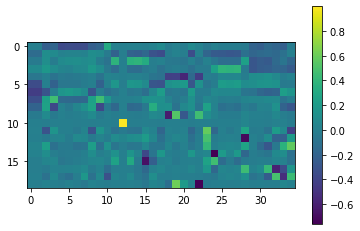

In [205]:
#### import numpy as np
import matplotlib.pyplot as plt

plt.imshow(eigen_vectors)
plt.colorbar()
plt.show()

In [3]:
# read buyer dataste
crime = pd.read_csv("crime.csv")
crimedata = agg_dataset()
crimedata.load_seller(crime, ["DBN"], "crime")
crimedata.compute_agg(True)

esl = pd.read_csv("esl.csv")
esldata = agg_dataset()
esldata.load_seller(esl, [["DBN","Grade"]], "esl")
esldata.compute_agg(True)

ap = pd.read_csv("ap.csv")
apdata = agg_dataset()
apdata.load_seller(ap, ["DBN"], "ap")
apdata.compute_agg(True)

survey = pd.read_csv("2013_NYC_School_Survey.csv")
surveydata = agg_dataset()
surveydata.load_seller(survey, ["DBN"], "survey")
surveydata.compute_agg(True)

base = pd.read_csv("base.csv")
basedata = agg_dataset()
basedata.load_seller(base, ["DBN"], "base")
basedata.compute_agg(True)

disc = pd.read_csv("disc.csv")
discdata = agg_dataset()
discdata.load_seller(disc, ["DBN"], "disc")
discdata.compute_agg(True)

math = pd.read_csv("math.csv")
mathdata = agg_dataset()
mathdata.load_seller(math, [["DBN","Grade"]], "math")
mathdata.compute_agg(True)

oss = pd.read_csv("oss.csv")
ossdata = agg_dataset()
ossdata.load_seller(oss, ["DBN"], "oss")
ossdata.compute_agg(True)

pe = pd.read_csv("pe.csv")
pedata = agg_dataset()
pedata.load_seller(pe, ["DBN"], "pe")
pedata.compute_agg(True)

s2tr = pd.read_csv("s2tr.csv")
s2trdata = agg_dataset()
s2trdata.load_seller(s2tr, ["DBN"], "s2tr")
s2trdata.compute_agg(True)

sat = pd.read_csv("sat.csv")
satdata = agg_dataset()
satdata.load_seller(sat, ["DBN"], "sat")
satdata.compute_agg(True)

pro = pd.read_csv("Schools_Progress_Report_2012-2013.csv")
prodata = agg_dataset()
prodata.load_seller(pro, ["DBN"], "pro")
prodata.compute_agg(True)


spy = pd.read_csv("spy.csv")
spydata = agg_dataset()
spydata.load_seller(spy, ["Year"], "spy")
spydata.compute_agg(True)

transfer = pd.read_csv("transfer.csv")
transferdata = agg_dataset()
transferdata.load_seller(transfer, ["DBN"], "transfer")
transferdata.compute_agg(True)

yabc = pd.read_csv("yabc.csv")
yabcdata = agg_dataset()
yabcdata.load_seller(yabc, ["DBN"], "yabc")
yabcdata.compute_agg(True)

dm1 = pd.read_csv("other/datamart.socrata.data-cityofnewyork-us.22rr-ujq3")
dm1data = agg_dataset()
dm1data.load_seller(dm1, ["DBN"], "dm1")
dm1data.compute_agg(True)

dm2 = pd.read_csv("other/datamart.socrata.data-cityofnewyork-us.25aa-q86c")
dm2data = agg_dataset()
dm2data.load_seller(dm2, ["DBN"], "dm2")
dm2data.compute_agg(True)

dm3 = pd.read_csv("other/datamart.socrata.data-cityofnewyork-us.29bv-qqsy")
dm3data = agg_dataset()
dm3data.load_seller(dm3, ["DBN"], "dm3")
dm3data.compute_agg(True)

dm4 = pd.read_csv("other/datamart.socrata.data-cityofnewyork-us.29ry-u5bf")
dm4data = agg_dataset()
dm4data.load_seller(dm4, ["DBN"], "dm4")
dm4data.compute_agg(True)

dm5 = pd.read_csv("other/datamart.socrata.data-cityofnewyork-us.43qc-8vv8")
dm5data = agg_dataset()
dm5data.load_seller(dm5, [["DBN","Grade"]], "dm5")
dm5data.compute_agg(True)

/home/jupyter/arda/arda-datasets/school/datamarket.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['cov:c'] = 1
/home/jupyter/arda/arda-datasets/school/datamarket.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['cov:Q:' + tablename + ":" + attributes[i] + ","+ tablename + ":" + attributes[j]] = self.data[attributes[i]] * self.data[attributes[j]]
/home/jupyter/arda/arda-datasets/school/datamarket.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

In [5]:
%%time
sellers = [(crimedata, "DBN"), (apdata, "DBN"), (surveydata, "DBN"), 
           (basedata, "DBN"), (discdata, "DBN"), (mathdata, ("DBN","Grade")), 
           (ossdata, "DBN"), (pedata, "DBN"), (s2trdata, "DBN"), 
           (satdata, "DBN"), (prodata, "DBN"), (spydata, "Year"),
           (transferdata, "DBN"), (yabcdata, "DBN"), (dm1data, "DBN"),
           (dm2data, "DBN"), (dm3data, "DBN"), (dm4data, "DBN"), (dm5data, ("DBN","Grade"))]

# find m best datasets to augment
bought = set()
m = 6

for i in range(m):
    best_seller = None
    best_seller_attrs = []
    best_dimension = None
    best_r2 = 0

    for sellerdata, dimension in sellers:
        # check if current seller has been bought
        if sellerdata.name in bought:
            continue

        # find the attributes and r2 of augmenting
        cur_atts, final_r2 = select_features(gender_train, gender_test, sellerdata, dimension,10)

        if final_r2 > best_r2:
            best_seller = sellerdata
            best_dimension = dimension
            best_seller_attrs = cur_atts
            best_r2 = final_r2


    print(best_seller.name, best_seller_attrs, best_r2)
    
    # absorb the best seller
    gender_train.absorb(best_seller, best_dimension, [x for x in best_seller_attrs if x in best_seller.X])
    gender_test.absorb(best_seller, best_dimension, [x for x in best_seller_attrs if x in best_seller.X])
    bought.add(best_seller.name)

/home/jupyter/arda/arda-datasets/school/datamarket.py:290: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  join = join.drop('cov:c_y', 1)
/home/jupyter/arda/arda-datasets/school/datamarket.py:317: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  join['cov:Q:' + att2 + "," + att1] = join['cov:s:' + att2] * join['cov:s:' + att1]/join['cov:c']


math ['math:Level 4 %', 'math:cbrLevel 1 %', 'math:logYear', 'math:cbrYear', 'math:cbrNumber Tested'] 0.6217600975927439
dm5 ['math:Level 4 %', 'math:cbrLevel 1 %', 'math:logYear', 'math:cbrYear', 'math:cbrNumber Tested', 'dm5:sqNum Level 4', 'dm5:cbrPct Level 3 and 4', 'dm5:Number Tested'] 0.7810190038694833
sat ['math:Level 4 %', 'math:cbrLevel 1 %', 'math:logYear', 'math:cbrYear', 'sat:logWriting Mean', 'sat:Mathematics Mean', 'sat:cbrNumber of Test Takers', 'sat:cbrCritical Reading Mean', 'sat:logCritical Reading Mean', 'dm5:cbrPct Level 3 and 4'] 0.7412042773002985
ap ['math:Level 4 %', 'math:cbrLevel 1 %', 'math:logYear', 'math:cbrYear', 'ap:sqTotal Exams Taken', 'gender:Number Tested', 'sat:cbrNumber of Test Takers'] 0.7611116405848909
yabc ['math:Level 4 %', 'math:cbrLevel 1 %', 'math:logYear', 'math:cbrYear', 'ap:sqTotal Exams Taken', 'gender:Number Tested', 'sat:cbrNumber of Test Takers', 'yabc:sq% Overage', 'yabc:cbrClosing the Achievement Gap Points', 'yabc:Average Math Pro

In [7]:
gender_train.X

['gender:Mean Scale Score',
 'gender:Number Tested',
 'math:Level 4 %',
 'math:cbrLevel 1 %',
 'math:logYear',
 'math:cbrYear',
 'math:cbrNumber Tested',
 'dm5:sqNum Level 4',
 'dm5:cbrPct Level 3 and 4',
 'dm5:Number Tested',
 'sat:logWriting Mean',
 'sat:Mathematics Mean',
 'sat:cbrNumber of Test Takers',
 'sat:cbrCritical Reading Mean',
 'sat:logCritical Reading Mean',
 'ap:sqTotal Exams Taken',
 'yabc:sq% Overage',
 'yabc:cbrClosing the Achievement Gap Points',
 'yabc:Average Math Proficiency',
 'transfer:logAverage English Proficiency']